In [5]:
from IPython.display import Image, display, HTML

CSS = """
.output {
    align-items: center;
}

.text_cell_render { /* Customize text cells */
line-height:2.5em;
}
"""

HTML('<style>{}</style>'.format(CSS))

# 6.041x - Unit 5: Continuous Random Variables
### Notes by Leo Robinovitch

***
## Core Concepts:

**Probability Density Functions (PDFs):** replace PMFs (Probability Mass Functions) from discrete random variables
* Discrete Random Variables have PMFs $p_X(x)$ where the following holds true
  * $P(a \leq x \leq b) = \sum\limits_{x:a \leq x \leq b}p_X(x)$
  * $p_X(x) \geq 0$
  * $\sum\limits_{x}p_X(x) = 1$
  <br><br>
  
* A random variable is **continuous** if the following holds true for its PDF $f_X(x)$:
  * $P(a \leq x \leq b) = \int_{a}^{b}f_X(x)dx$
  * $f_X(x) \geq 0$
  * $\int_{-\infty}^{\infty}f_X(x)dx = 1$
  <br><br>
  
* Units of PDF are probability per unit length:
  * $P(a \leq x \leq x + \delta) \approx f_X(a) \bullet \delta \to$ using rectangular approximation
  <br><br>
* Also notable from above: $P(x = a) =  0 \to$ any particular point has zero probability
* PDFs do not have to be continuous functions (they can have discontinuities)
* Finally, $P(a \leq x \leq b) = P(a < x < b) \to$ endpoints don't matter
<br><br>


**Continuous Uniform Random Variable:** rather than integers between a and b being possible (discrete case), any real number between a and b is possible


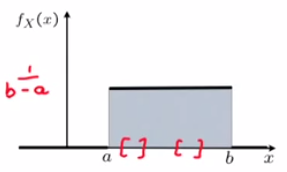

In [6]:
display(Image(filename='l8_1.png', embed=True, width=300))

** Expectation of Continuous Random Variables:** average in a large number of independent repetitions of probabilistic experiment
$$E[X] = \int_{-\infty}^{\infty}xf_X(x)dx$$
* Holds true as long as $\int_{-\infty}^{\infty}|x|f_X(x)dx < \infty$
* Still true that expectation/average is "center of gravity" of PDF
* If $X \geq 0$, then $E[X] \geq 0$
* If $a \leq X \leq b$, then $a \leq E[X] \leq b$
<br><br>


**Expected Value Rule for Uniform Random Variables:**
$$E[g(X)] = \int_{-\infty}^{\infty}g(x)f_X(x)dx$$
<br><br>


**Linearity of Expectations:**
$$E[aX + b] = aE[X] + b$$
* Derivation from applying Expected Value Rule to $g(X) = aX + b$ and separating terms (same as with discrete)
<br><br>


**Variance of Uniform Random Variables:**
* Recall $var(X) = E[(X - \mu)^2]$ where $\mu = E[X]$
* Using Expected Value Rule:
$$var(X) = \int_{-\infty}^{\infty}(x - \mu)^2f_X(x)dx$$
<br><br>


**Standard Deviation of Uniform Random Variables:**
$$\sigma_X = \sqrt{var(X)}$$
<br><br>


**Variance Rules:**
* Still true that $var(aX + b) = a^2var(X)$
* Useful formula still holds: $var(X) = E[X^2] - (E[X])^2$
<br><br>


**Mean and Variance of Uniform Continuous Random Variable:**
* $E[X] = \int_{-\infty}^{\infty}xf_X(x)dx = \int_{a}^{b}x\frac{1}{b-a}dx = \frac{b - a}{2} \to$ same as discrete and intuitive b/c uniform PDF is symmetrical about expectation
* Variance calculation:
  * $E[X^2] = \int_{a}^{b}x^2\frac{1}{b-a}dx$
  * $var(X) = E[X^2] - (E[X])^2 = \frac{(b - a)^2}{12} \to$ similar but not same as discrete
  <br><br>
* As such, $\sigma = \frac{b - a}{\sqrt{12}}$ for uniform PDF
<br><br>


**Exponential Random Variables:** single parameter $\lambda > 0 \to$ generally models **waiting time until an event occurs**

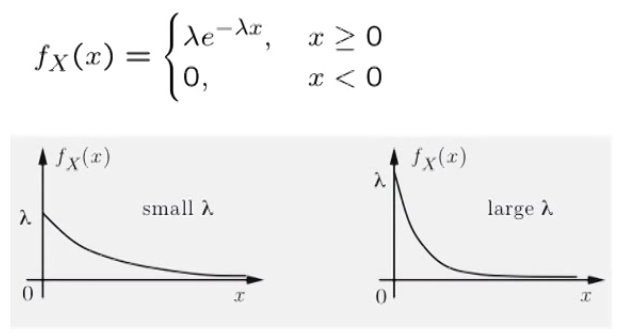

In [7]:
display(Image(filename='l8_2.png', embed=True, width=500))

Looks very similar to Geometric Random Variable, but in continuous form
* Start point is lambda and rate of decay is also lambda
* Tail Probability $P(X \geq a)$:
$$P(X \geq a) = \int_{a}^{\infty}\lambda e^{-\lambda x}dx = e^{-\lambda a}$$
<br>
* Note that this means that if $a = 0$, area under whole PDF is 1 as expected
* Expected value of Exponential Random Variable:
$$E[X] = \int_{0}^{\infty} x \bullet \lambda e^{-\lambda x}dx = \frac{1}{\lambda}$$
<br>
* To calculate Variance of Exponential Random Variable:
$$E[X^2] = \int_{0}^{\infty} x^2 \bullet \lambda e^{-\lambda x}dx = \frac{2}{\lambda^2}$$
<br>
$$var(X) = E[X^2] - (E[X])^2 = \frac{1}{\lambda^2}$$
<br><br>


**Cumulative Distribution Functions (CDFs):** unifying representation of both discrete and continuous random variables
$$F_X(x) = P(X \leq x)$$
<br>
* Becuase of additivity property of probabilities, can break CDF into multiple probabilities: $P(X \leq 4) = P(X \leq 3) + P(3 \leq X \leq 4)$
  * In this way accommodates both continuous and discrete Random Variables
  <br><br>
* For continuous Random Variables:
$$F_X(x) = \int_{-\infty}^{x}f_X(t)dt$$
<br>
* As such, value of PDF is derivative of CDF at any differentiable point:
$$\frac{dF_X}{dx}(x) = f_X(x)$$
<br>
* For discrete Random Variables:
$$F_X(x) = \sum\limits_{k \leq x}p_X(k)$$

***
## Lecture 8, 9, and 10 Exercises:  
Currently unavailable in archived course.

***
## Solved Problems:

**#1: Question 1:**

***
## Problem Set 5:  
See 2010 Problem Set 5.

In [10]:
!jupyter nbconvert Unit_05.ipynb --to html --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook Unit_05.ipynb to html
[NbConvertApp] Writing 343440 bytes to Unit_05.html
